In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [7]:
TriggerTime = 337200672

In [8]:
Q0 =fits.open('AS1T03_clean_0.1_Q0.lc')
Q1 =fits.open('AS1T03_clean_0.1_Q1.lc')
Q2 =fits.open('AS1T03_clean_0.1_Q2.lc')
Q3 =fits.open('AS1T03_clean_0.1_Q3.lc')

In [9]:
Q0_time = Q0[1].data['TIME'][42000:44500]
Q0_rate = Q0[1].data['RATE'][42000:44500]

Q1_time = Q1[1].data['TIME'][42000:44500]
Q1_rate = Q1[1].data['RATE'][42000:44500]

Q2_time = Q2[1].data['TIME'][42000:44500]
Q2_rate = Q2[1].data['RATE'][42000:44500]

Q3_time = Q3[1].data['TIME'][42000:44500]
Q3_rate = Q3[1].data['RATE'][42000:44500]

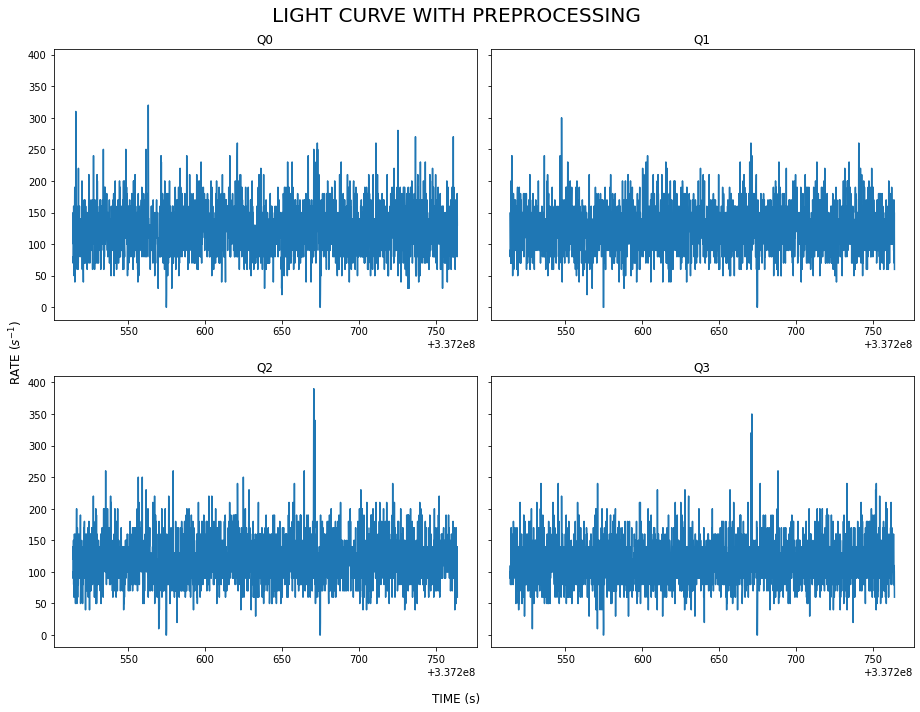

In [10]:
figure, axis = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

figure.suptitle('LIGHT CURVE WITH PREPROCESSING',fontsize=20)
axis[0, 0].plot(Q0_time , Q0_rate)
axis[0, 0].set_title("Q0")

axis[0, 1].plot(Q1_time , Q1_rate)
axis[0, 1].set_title("Q1")

axis[1, 0].plot(Q2_time , Q2_rate)
axis[1, 0].set_title("Q2")

axis[1, 1].plot(Q3_time , Q3_rate)
axis[1, 1].set_title("Q3")

figure.supxlabel('TIME (s)')
figure.supylabel('RATE ($s^{-1}$)')
plt.tight_layout()

In [13]:
def get_SA_start_end(li):
    max_count = 0
    count = 0
    ind=0
    for i in range(len(li)):
        if li[i] == 0:
            count += 1
        else:
            if max_count<count:
                max_count = count
                ind=i
            count = 0
            
    return ind-max_count,ind

### Plot Funciton

In [38]:
def plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data):
    figure, axis = plt.subplots(4, 2, figsize=(15, 15))
    axis[0, 0].plot(Q0_time, Q0_rate, label = 'Light Curve')
    axis[0, 0].plot(Q0_time, Q0_trend, label = 'Trend')
    axis[0, 0].legend(loc='best')
    axis[0, 0].set_title("Q0")
    axis[0, 1].plot(Q0_time, Q0_detrend_data, label = 'Detrended Curve')
    axis[0, 1].legend(loc='best')
    axis[0, 1].set_title("Q0_detrended")

    axis[1, 0].plot(Q1_time, Q1_rate, label = 'Light Curve')
    axis[1, 0].plot(Q1_time, Q1_trend, label = 'Trend')
    axis[1, 0].legend(loc='best')
    axis[1, 0].set_title("Q0")
    axis[1, 1].plot(Q1_time, Q1_detrend_data, label = 'Detrended Curve')
    axis[1, 1].legend(loc='best')
    axis[1, 1].set_title("Q1_detrended")

    axis[2, 0].plot(Q2_time, Q2_rate, label = 'Light Curve')
    axis[2, 0].plot(Q2_time, Q2_trend, label = 'Trend')
    axis[2, 0].legend(loc='best')
    axis[2, 0].set_title("Q0")
    axis[2, 1].plot(Q2_time, Q2_detrend_data, label = 'Detrended Curve')
    axis[2, 1].legend(loc='best')
    axis[2, 1].set_title("Q2_detrended")

    axis[3, 0].plot(Q3_time, Q3_rate, label = 'Light Curve')
    axis[3, 0].plot(Q3_time, Q3_trend, label = 'Trend')
    axis[3, 0].legend(loc='best')
    axis[3, 0].set_title("Q0")
    axis[3, 1].plot(Q3_time, Q3_detrend_data, label = 'Detrended Curve')
    axis[3, 1].legend(loc='best')
    axis[3, 1].set_title("Q3_detrended")
    plt.tight_layout()

### SNR (S-B)/std function

In [24]:
def SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):    
    
    print('(S-B)/std SNR')
    Q0_rate_max_ind = np.argmax(Q0_detrend_data)
    Q0_noise = np.concatenate((Q0_detrend_data[:Q0_rate_max_ind-300],Q0_detrend_data[Q0_rate_max_ind+300:]))
    Q0_mean , Q0_std = np.mean(Q0_noise) , np.std(Q0_noise)
    Q0_SNR = (max(Q0_detrend_data)-Q0_mean)/Q0_std
    print('Q0 SNR = ',Q0_SNR)

    Q1_rate_max_ind = np.argmax(Q1_detrend_data)
    Q1_noise = np.concatenate((Q1_detrend_data[:Q1_rate_max_ind-300],Q1_detrend_data[Q1_rate_max_ind+300:]))
    Q1_mean , Q1_std = np.mean(Q1_noise) , np.std(Q1_noise)
    Q1_SNR = (max(Q1_detrend_data)-Q1_mean)/Q1_std
    print('Q1 SNR = ',Q1_SNR)

    Q2_rate_max_ind = np.argmax(Q2_detrend_data)
    Q2_noise = np.concatenate((Q2_detrend_data[:Q2_rate_max_ind-300],Q2_detrend_data[Q2_rate_max_ind+300:]))
    Q2_mean , Q2_std = np.mean(Q2_noise) , np.std(Q2_noise)
    Q2_SNR = (max(Q2_detrend_data)-Q2_mean)/Q2_std
    print('Q2 SNR = ',Q2_SNR)

    Q3_rate_max_ind = np.argmax(Q3_detrend_data)
    Q3_noise = np.concatenate((Q3_detrend_data[:Q3_rate_max_ind-300],Q3_detrend_data[Q3_rate_max_ind+300:]))
    Q3_mean , Q3_std = np.mean(Q3_noise) , np.std(Q3_noise)
    Q3_SNR = (max(Q3_detrend_data)-Q3_mean)/Q3_std
    print('Q3 SNR = ',Q3_SNR)

### Noise extraction Fucntions

In [21]:
def get_noise_with_mean(rate):
    SA_w_start, SA_w_end = get_SA_start_end(rate)
    rate_max_ind = np.argmax(rate)
    GRB_start, GRB_end = rate_max_ind-3000, rate_max_ind+3000
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:SA_w_start], rate[SA_w_end:]])
    noise_mean= np.mean(noise)
    noise = np.concatenate([rate[:GRB_start], [noise_mean]*(GRB_end-GRB_start),
                              rate[GRB_end:SA_w_start], [0]*(SA_w_end-SA_w_start),rate[SA_w_end:]])
    return noise

def get_noise(rate0,rate):
    SA_w_start, SA_w_end = get_SA_start_end(rate0)
    rate_max_ind = np.argmax(rate)
    GRB_start, GRB_end = rate_max_ind-3000, rate_max_ind+3000
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:SA_w_start], rate[SA_w_end:]])
    return noise


In [22]:
Q0_noise = get_noise_with_mean(Q0_rate)
Q0_mfilter = [0]*len(Q0_noise)
windows_size=80
for i in range(0,len(Q0_noise),windows_size):
    Q0_mfilter[i:i+windows_size] = [np.mean(Q0_noise[i:i+windows_size])]*windows_size
Q0_trend=Q0_mfilter[:72400]
Q0_detrend_data = Q0_rate-Q0_trend

### Mean Filter

In [17]:
def mean_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_mfilter = [0]*len(Q0_noise)
    windows_size=80
    for i in range(0,len(Q0_noise),windows_size):
        Q0_mfilter[i:i+windows_size] = [np.mean(Q0_noise[i:i+windows_size])]*windows_size
    Q0_trend=Q0_mfilter[:72400]
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_mfilter = [0]*len(Q1_noise)
    for i in range(0,len(Q1_noise),windows_size):
        Q1_mfilter[i:i+windows_size] = [np.mean(Q1_noise[i:i+windows_size])]*windows_size
    Q1_trend=Q1_mfilter[:72400]
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_mfilter = [0]*len(Q2_noise)
    for i in range(0,len(Q2_noise),windows_size):
        Q2_mfilter[i:i+windows_size] = [np.mean(Q2_noise[i:i+windows_size])]*windows_size
    Q2_trend=Q2_mfilter[:72400]
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_mfilter = [0]*len(Q3_noise)
    for i in range(0,len(Q3_noise),windows_size):
        Q3_mfilter[i:i+windows_size] = [np.mean(Q3_noise[i:i+windows_size])]*windows_size
    Q3_trend=Q3_mfilter[:72400]
    Q3_detrend_data = Q3_rate-Q3_trend

    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Median Filter

In [26]:
def median_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_mfilter = [0]*len(Q0_noise)
    windows_size=80
    for i in range(0,len(Q0_noise),windows_size):
        Q0_mfilter[i:i+windows_size] = [np.median(Q0_noise[i:i+windows_size])]*windows_size
    Q0_trend=Q0_mfilter[:72400]
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_mfilter = [0]*len(Q1_noise)
    for i in range(0,len(Q1_noise),windows_size):
        Q1_mfilter[i:i+windows_size] = [np.median(Q1_noise[i:i+windows_size])]*windows_size
    Q1_trend=Q1_mfilter[:72400]
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_mfilter = [0]*len(Q2_noise)
    for i in range(0,len(Q2_noise),windows_size):
        Q2_mfilter[i:i+windows_size] = [np.median(Q2_noise[i:i+windows_size])]*windows_size
    Q2_trend=Q2_mfilter[:72400]
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_mfilter = [0]*len(Q3_noise)
    for i in range(0,len(Q3_noise),windows_size):
        Q3_mfilter[i:i+windows_size] = [np.median(Q3_noise[i:i+windows_size])]*windows_size
    Q3_trend=Q3_mfilter[:72400]
    Q3_detrend_data = Q3_rate-Q3_trend

    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Savgol Filter

In [31]:
def savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    print('SAVGOL FILTER')
    window_length = 100
    polyorder=2

    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_trend = signal.savgol_filter(Q0_noise , window_length, polyorder)
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_trend = signal.savgol_filter(Q1_noise , window_length, polyorder)
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_trend = signal.savgol_filter(Q2_noise , window_length, polyorder)
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_trend = signal.savgol_filter(Q3_noise , window_length, polyorder)
    Q3_detrend_data = Q3_rate-Q3_trend
    
    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Gausian SNR

In [35]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('GAUSSIAN SNR')
    Q0_noise = get_noise(Q0_rate, Q0_detrend_data)
    n, bins = np.histogram(Q0_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q0 SNR = ',abs((max(Q0_detrend_data))/(popt[1]+3*popt[2])))
    
    Q1_noise = get_noise(Q1_rate, Q1_detrend_data)
    n, bins = np.histogram(Q1_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q1 SNR = ',abs((max(Q1_detrend_data))/(popt[1]+3*popt[2])))
    
    Q2_noise = get_noise(Q2_rate, Q3_detrend_data)
    n, bins = np.histogram(Q2_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q2 SNR = ',abs((max(Q2_detrend_data))/(popt[1]+3*popt[2])))
    
    Q3_noise = get_noise(Q3_rate, Q3_detrend_data)
    n, bins = np.histogram(Q3_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q3 SNR = ',abs((max(Q3_detrend_data))/(popt[1]+3*popt[2])))

SAVGOL FILTER
GAUSSIAN SNR
Q0 SNR =  13.353887490845064
Q1 SNR =  10.226527383414194
Q2 SNR =  20.15181228416277
Q3 SNR =  13.126029309183203


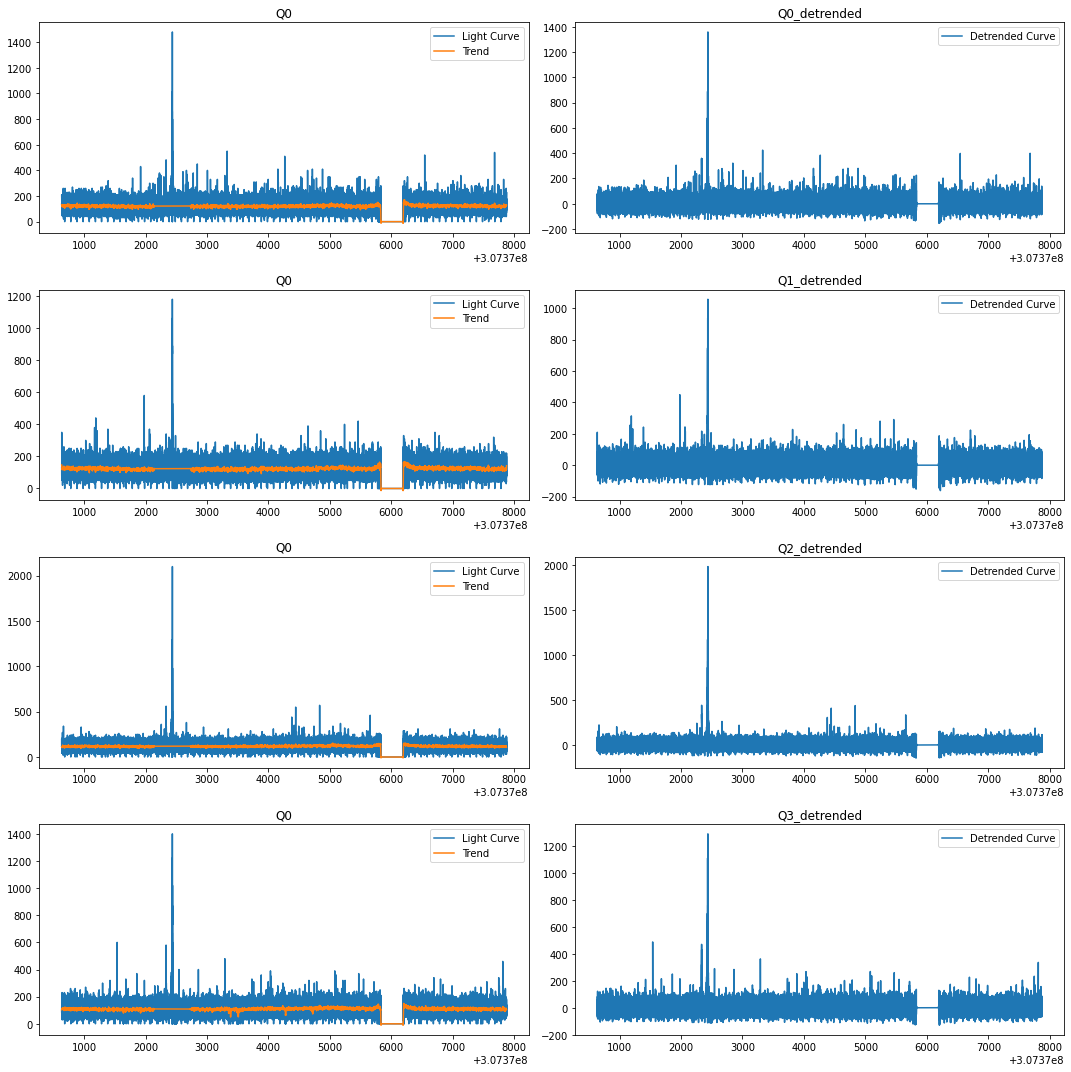

In [39]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

In [40]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
(S-B)/std SNR
Q0 SNR =  37.18112759579954
Q1 SNR =  29.44611052810439
Q2 SNR =  54.98928340905092
Q3 SNR =  37.054013709673136


### Poisson SNR

In [79]:
def poisson_func(x, x0):
    return poisson.pmf(x,x0)

def Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('Poisson SNR')
    Q0_noise = get_noise(Q0_rate, Q0_detrend_data)
    Q0_noise_off = Q0_noise+1250
    n, bins = np.histogram(Q0_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q0 SNR = ',((max(Q0_detrend_data))/(popt[0]+3*h))*10)
    
    Q1_noise = get_noise(Q1_rate, Q1_detrend_data)
    Q1_noise_off = Q1_noise+1250
    n, bins = np.histogram(Q1_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q1_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q1 SNR = ',((max(Q1_detrend_data))/(popt[0]+3*h))*10)
    
    Q2_noise = get_noise(Q2_rate, Q2_detrend_data)
    Q2_noise_off = Q2_noise+1250
    n, bins = np.histogram(Q2_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q2_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q2 SNR = ',((max(Q2_detrend_data))/(popt[0]+3*h))*10)
    
    Q3_noise = get_noise(Q3_rate, Q3_detrend_data)
    Q3_noise_off = Q3_noise+1250
    n, bins = np.histogram(Q3_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q3 SNR = ',((max(Q3_detrend_data))/(popt[0]+3*h))*10)

In [77]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
Poisson SNR
Q0 SNR =  108.6743026746096
Q1 SNR =  84.53095786624382
Q2 SNR =  158.49976269620214
Q3 SNR =  103.24503385310872


In [ ]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
Q0_noise = get_noise(Q0_detrend_data)
n, bins = np.histogram(Q0_noise, bins=80)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
popt, pcov = curve_fit(gauss_func,bin_centers,n)
xplot = np.linspace(-65,75,len(bin_centers))
plt.figure(figsize=(10,6))
plt.title('Gausssian Fit to Noise',fontsize=15)
plt.scatter(bin_centers,n,label='Data')
plt.plot(xplot,gauss_func(xplot,popt[0],popt[1],popt[2]),label='Gaussian Fit')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
plt.savefig('Gausssian Fit.jpeg')

1250.0203346373914


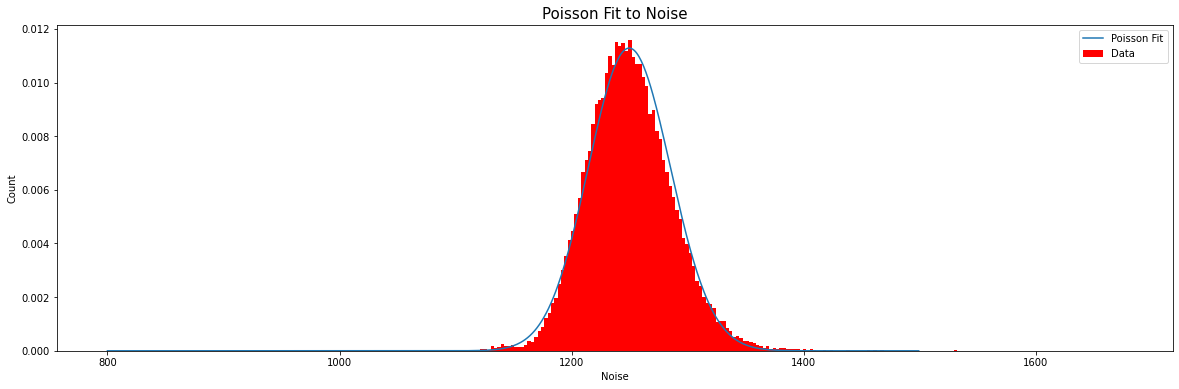

In [73]:
def poisson_func(x, x0):
    return poisson.pmf(x,x0)

Q0_noise = get_noise(Q0_rate, Q0_detrend_data)
Q0_noise_off = Q0_noise+1250
n, bins = np.histogram(Q0_noise_off, bins=200,density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
print(popt[0])
xplot = np.arange(800,1500)
plt.figure(figsize=(20,6))
plt.title('Poisson Fit to Noise',fontsize=15)
plt.bar(bin_centers,n,label='Data',color='r',width=3)
plt.plot(xplot,poisson_func(xplot,popt[0]),label='Poisson Fit')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
plt.savefig('Poisson Fit')

In [80]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
(S-B)/std SNR
Q0 SNR =  37.18112759579954
Q1 SNR =  29.44611052810439
Q2 SNR =  54.98928340905092
Q3 SNR =  37.054013709673136
GAUSSIAN SNR
Q0 SNR =  13.353887490845064
Q1 SNR =  10.226527383414194
Q2 SNR =  20.15181228416277
Q3 SNR =  13.126029309183203
Poisson SNR
Q0 SNR =  10.86743026746096
Q1 SNR =  8.453095786624383
Q2 SNR =  15.849976269620214
Q3 SNR =  10.324503385310873
